<a href="https://colab.research.google.com/github/PutriAW/DTI-ASSIGNMENT-CLASSIFICATION/blob/main/Bank_Marketing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BANK MARKETING CLASSIFICATION**
Created By Putri Apriyanti Windya 
 (DS0124 - Data Scientist 01)

# **Dataset**

---
 Dataset for this classification obtained from https://www.kaggle.com/janiobachmann/bank-marketing-dataset 

# **Description**

---


There are 17 columns in this dataset. Each row in this dataset represent one customer. Each columns described below:



1.   Age
2.   Job
3. Marital
4. Education
5. Default
6. Balance
7. Housing
8. Loan
9. Contact
10. Day
11. Month
12. Duration
13. Campaign
14. Pdays
15. Previous
16. Poutcome
17. Deposit

From 17 columns we have, we will choose some column that relateable to our problem to get the best solution


# **Problem to Solve**

---

Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

# **Data Preparation**

## **Data Exploration**

**Import All Libraries that Needed for Data Preparation**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [2]:
dfBank = pd.read_csv('https://raw.githubusercontent.com/PutriAW/DTI-ASSIGNMENT-CLASSIFICATION/main/bank.csv', sep =",")
dfBank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
# Prints the Dataset Information
dfBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
# describe dataset descriptive statistics to know next step
dfBank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [5]:
# check total of null values for each columns 
print(dfBank.isnull().sum())

# Sum all record that contain null values 
print("Total Null Record :  ",dfBank.isnull().sum().sum())

# check null values percentage
print('Presentase null value: ')
print(round(dfBank.isnull().sum()/len(dfBank)*100, 2),"%")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64
Total Null Record :   0
Presentase null value: 
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64 %


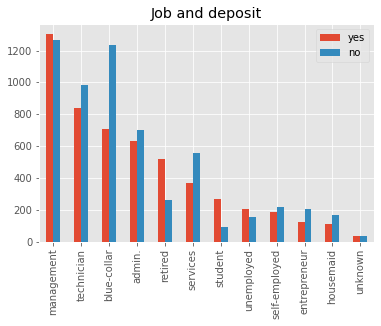

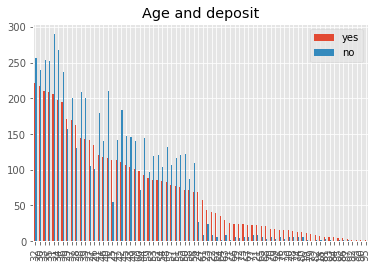

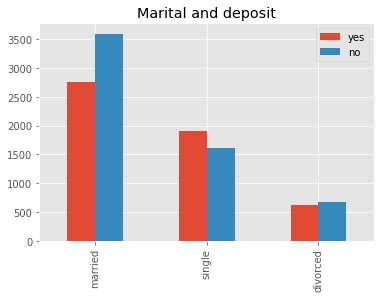

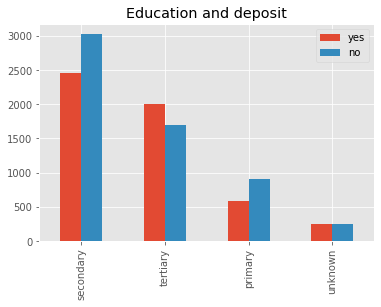

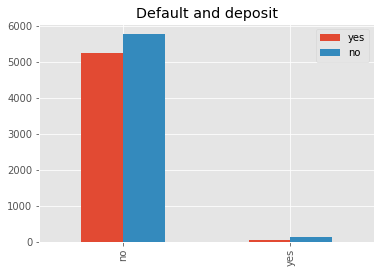

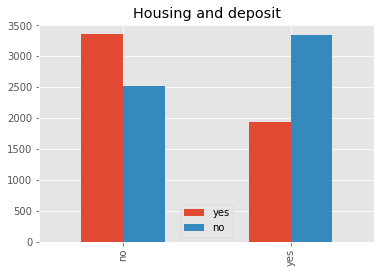

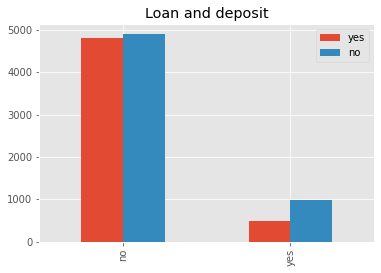

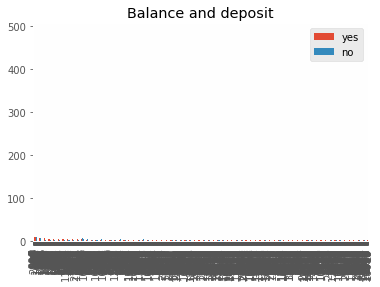

In [6]:
#check yes and no frequency for some related column to deposit
dfJob = pd.DataFrame()
dfJob['yes'] = dfBank[dfBank['deposit'] == 'yes']['job'].value_counts()
dfJob['no'] = dfBank[dfBank['deposit'] == 'no']['job'].value_counts()

dfAge = pd.DataFrame()
dfAge['yes'] = dfBank[dfBank['deposit'] == 'yes']['age'].value_counts()
dfAge['no'] = dfBank[dfBank['deposit'] == 'no']['age'].value_counts()

dfMarit = pd.DataFrame()
dfMarit['yes'] = dfBank[dfBank['deposit'] == 'yes']['marital'].value_counts()
dfMarit['no'] = dfBank[dfBank['deposit'] == 'no']['marital'].value_counts()

dfEd = pd.DataFrame()
dfEd['yes'] = dfBank[dfBank['deposit'] == 'yes']['education'].value_counts()
dfEd['no'] = dfBank[dfBank['deposit'] == 'no']['education'].value_counts()

dfDef = pd.DataFrame()
dfDef['yes'] = dfBank[dfBank['deposit'] == 'yes']['default'].value_counts()
dfDef['no'] = dfBank[dfBank['deposit'] == 'no']['default'].value_counts()

dfHousing = pd.DataFrame()
dfHousing['yes'] = dfBank[dfBank['deposit'] == 'yes']['housing'].value_counts()
dfHousing['no'] = dfBank[dfBank['deposit'] == 'no']['housing'].value_counts()

dfLoan = pd.DataFrame()
dfLoan['yes'] = dfBank[dfBank['deposit'] == 'yes']['loan'].value_counts()
dfLoan['no'] = dfBank[dfBank['deposit'] == 'no']['loan'].value_counts()

dfBal = pd.DataFrame()
dfBal['yes'] = dfBank[dfBank['deposit'] == 'yes']['balance'].value_counts()
dfBal['no'] = dfBank[dfBank['deposit'] == 'no']['balance'].value_counts()

dfJob.plot.bar(title = 'Job and deposit')
dfAge.plot.bar(title = 'Age and deposit')
dfMarit.plot.bar(title = 'Marital and deposit')
dfEd.plot.bar(title = 'Education and deposit')
dfDef.plot.bar(title = 'Default and deposit')
dfHousing.plot.bar(title = 'Housing and deposit')
dfLoan.plot.bar(title = 'Loan and deposit')
dfBal.plot.bar(title = 'Balance and deposit')

# sns.set_palette('colorblind')
# sns.pairplot(data=[dfAge, dfJob, dfMarit, dfEd, dfDef, dfHousing, dfLoan, dfBal])

## **Data Cleansing**


---

In this step we will remove unused column or handling null values, but in ur dataset there is no null valuues and we dont wont to remove any columns so just skip this step.





## **Feature Engineering**


---

In this step we check categorical column in our dataset and then choose which column that we will use for our classification. there are 3 type of feature transformation:


1.   Categorical Encoding. In this moment I use this method by using LabelEncoder function.
2.   Scalling. if we want to scale our data in range [0,1]. we can use Min-Max Normalizer, Mean Normalization, Z-Score or unit length.
3. Binning
# Bagian Baru



In [7]:
#check categorical columns
# cat_columns = [dfBank.job, dfBank.marital, dfBank.education, dfBank.default, dfBank.housing, dfBank.loan, dfBank.contact, dfBank.month, dfBank.poutcome]
cat_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','deposit']
for cat_column in cat_columns:
  print(cat_column,' : ',dfBank[cat_column].unique())

job  :  ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital  :  ['married' 'single' 'divorced']
education  :  ['secondary' 'tertiary' 'primary' 'unknown']
default  :  ['no' 'yes']
housing  :  ['yes' 'no']
loan  :  ['no' 'yes']
contact  :  ['unknown' 'cellular' 'telephone']
month  :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome  :  ['unknown' 'other' 'failure' 'success']
deposit  :  ['yes' 'no']


In [8]:
# categorical encoding
le = pre.LabelEncoder()
for catCol in cat_columns:
  dfBank[catCol] = le.fit_transform(dfBank[catCol])

dfBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


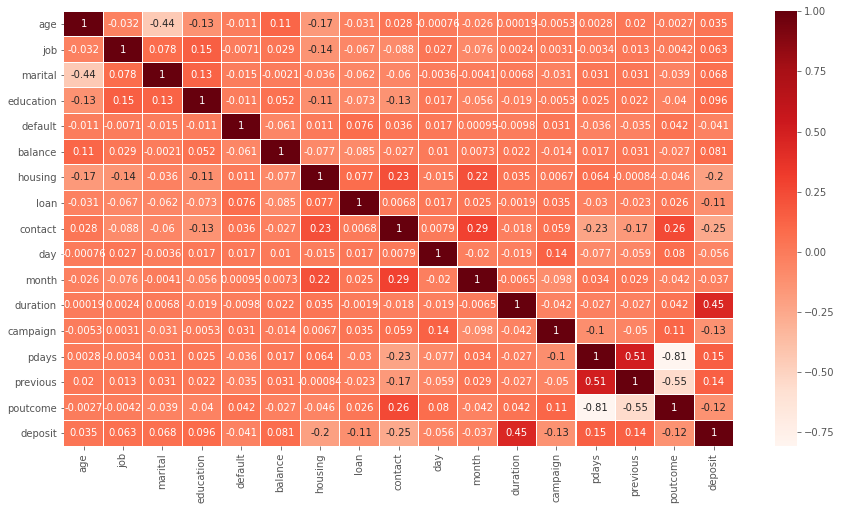

In [9]:
'''check all correlation between variables to take next step. when the color closed to 1 its means that the correlation is positive 
and if the color closed to -0.75 its means that the correlation is negative
''' 
plt.figure(figsize=(15,8))
sns.heatmap(dfBank.corr(), annot=True, linewidths=0.1, cmap='Reds')

In [10]:
#drop deposit from our feature
feature = dfBank.drop(['deposit'], axis=1)
feature.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


In [11]:
# Select Target/ label
label = dfBank['deposit']
label


0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

## **Split Data**




---



In this step we split data into 2 type, there are data train and data test

In [12]:
# import library to split data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [13]:
# Split data into 70% Train and 30% Test
X_train, X_test, y_train, y_test  = train_test_split(feature , label, shuffle = True, test_size=0.3, random_state=111)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7813, 16)
(3349, 16)
(7813,)
(3349,)


# **Classification**

In [14]:
# import classification library
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## **Support Vector Machine**


---

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well .

In [15]:
# Modelling SVM Classification
# svmc = SVC(kernel='linear', gamma='auto')
svmc = SVC(kernel='rbf', gamma='auto', probability=True)

# Training SVM
svmc.fit(X_train, y_train)

# predict SVM to test data
y_pred_svm = svmc.predict(X_test)


**Evaluate SVM Model**

In [16]:
# Show the Confussion Matrix
cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[1788,    2],
       [1558,    1]])

In [17]:
accSVM = metrics.accuracy_score(y_test, y_pred_svm)
print("Akurasi SVM:",accSVM)
LEvalDt = metrics.precision_recall_fscore_support(y_test, y_pred_svm, average='micro')
print("Precision:",LEvalDt[0])
print("Recall:",LEvalDt[1])
print("F1-Score:",LEvalDt[2])

Akurasi SVM: 0.5341893102418632
Precision: 0.5341893102418632
Recall: 0.5341893102418632
F1-Score: 0.5341893102418632


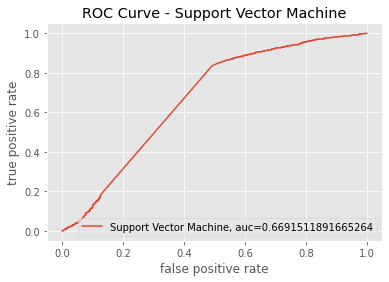

In [18]:
# ROC Curve
y_pred_svm_proba = svmc.predict_proba(X_test)[::,1]
fprsvm, tprsvm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
aucsvm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
plt.plot(fprsvm,tprsvm,label="Support Vector Machine, auc="+str(aucsvm))
plt.title('ROC Curve - Support Vector Machine')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Decision Tree**


---


A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

In [19]:
# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

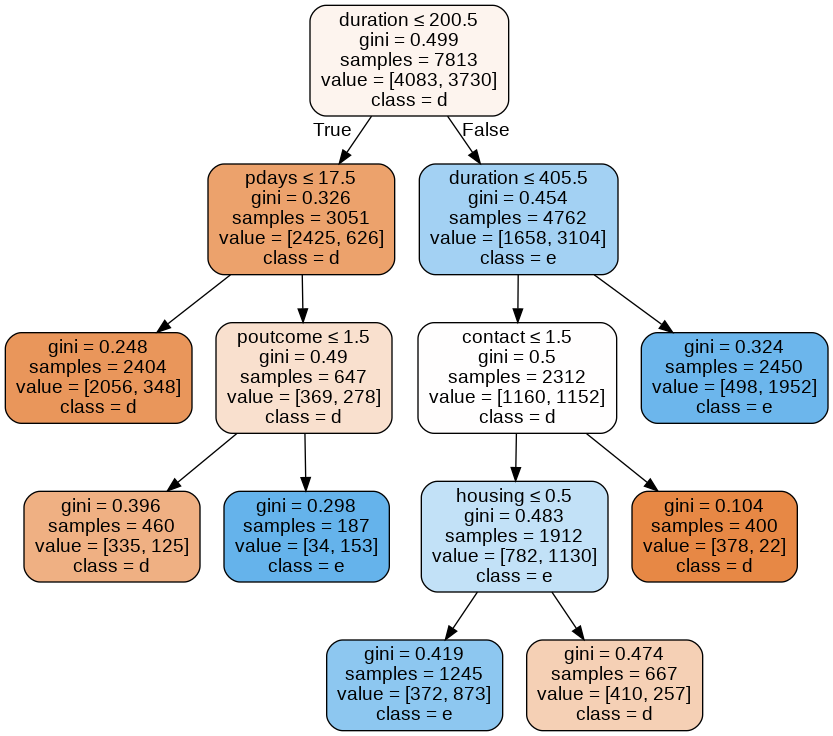

In [20]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names='deposit',
                feature_names=feature.columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


**Evaluate DT Model**

In [21]:
# Evaluate Model
# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[1374,  416],
       [ 321, 1238]])

In [22]:
accDT = metrics.accuracy_score(y_test, y_pred_dtc)
print("Akurasi DT:",accDT)
LEvalDt = metrics.precision_recall_fscore_support(y_test, y_pred_dtc, average='micro')
print("Precision:",LEvalDt[0])
print("Recall:",LEvalDt[1])
print("F1-Score:",LEvalDt[2])

Akurasi DT: 0.7799343087488803
Precision: 0.7799343087488803
Recall: 0.7799343087488803
F1-Score: 0.7799343087488803


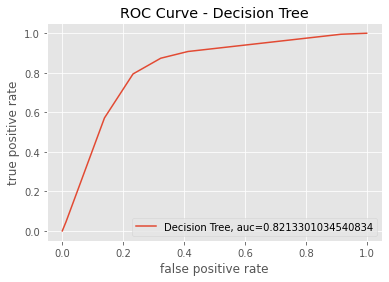

In [23]:
# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Gaussian Naive Bayes**


---
Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality. They find use when the dimensionality of the inputs is high. Complex classification problems can also be implemented by using Naive Bayes Classifier. Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. 


In [24]:
# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

In [25]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[1282,  508],
       [ 345, 1214]])

**Evaluate GNB Model**

In [26]:
accGNB = metrics.accuracy_score(y_test, y_pred_gnb)
print("Akurasi Gaussian Naive Bayes:",accGNB)
LEvalGnb = metrics.precision_recall_fscore_support(y_test, y_pred_gnb, average='micro')
print("Precision:",LEvalGnb[0])
print("Recall:",LEvalGnb[1])
print("F1-Score:",LEvalGnb[2])

Akurasi Gaussian Naive Bayes: 0.7452971036130188
Precision: 0.7452971036130188
Recall: 0.7452971036130188
F1-Score: 0.7452971036130187


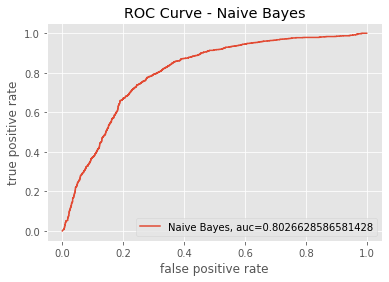

In [27]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **K-Nearest Neighbour**


---
k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

* In k-NN classification, the output is a class membership. An object is 
classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, normalizing the training data can improve its accuracy dramatically.


In [28]:
# Modeling Naive Bayes Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict to Test Data
y_pred_knn= knn.predict(X_test)

**Evaluate KNN Model**

In [29]:
# Show the Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[1383,  407],
       [ 421, 1138]])

In [30]:
accKNN = metrics.accuracy_score(y_test, y_pred_knn)
print("Akurasi KNN:",accKNN)
LEvalKnn = metrics.precision_recall_fscore_support(y_test, y_pred_knn, average='micro')
print("Precision:",LEvalKnn[0])
print("Recall:",LEvalKnn[1])
print("F1-Score:",LEvalKnn[2])

Akurasi KNN: 0.752762018512989
Precision: 0.752762018512989
Recall: 0.752762018512989
F1-Score: 0.752762018512989


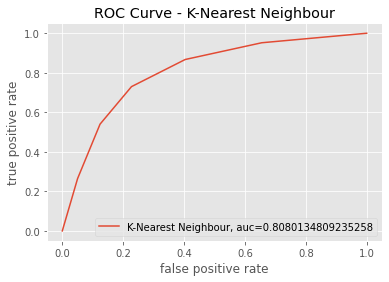

In [31]:
# ROC Curve
y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="K-Nearest Neighbour, auc="+str(aucknn))
plt.title('ROC Curve - K-Nearest Neighbour')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Random Forest**


---

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

In [32]:
# Modeling Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Predict to Test Data
y_pred_rfc= knn.predict(X_test)

**Evaluate Random Forest Model**

In [33]:
# Show the Confussion Matrix
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[1383,  407],
       [ 421, 1138]])

In [34]:
accRFC = metrics.accuracy_score(y_test, y_pred_rfc)
print("Akurasi KNN:",accRFC)
LEvalRfc = metrics.precision_recall_fscore_support(y_test, y_pred_rfc, average='micro')
print("Precision:",LEvalRfc[0])
print("Recall:",LEvalRfc[1])
print("F1-Score:",LEvalRfc[2])

Akurasi KNN: 0.752762018512989
Precision: 0.752762018512989
Recall: 0.752762018512989
F1-Score: 0.752762018512989


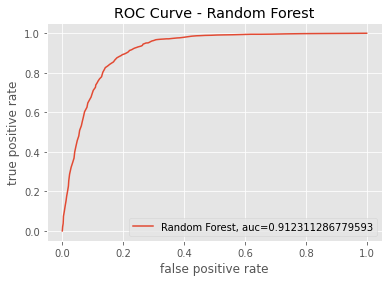

In [35]:
# ROC Curve
y_pred_rfc_proba = rfc.predict_proba(X_test)[::,1]
fprrfc, tprrfc, _ = metrics.roc_curve(y_test,  y_pred_rfc_proba)
aucrfc = metrics.roc_auc_score(y_test, y_pred_rfc_proba)
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Model Comparison**

In [36]:
# Accuracy Comparison
model = ['SVM', 'Decision Tree', 'GNB', 'KNN', 'Random Forest']
accuracies = [accSVM, accDT, accGNB, accKNN, accRFC]
comp = pd.DataFrame(list(zip(model, accuracies)), columns=['Model', 'Accuracy'])
comp


,Model,Accuracy
0,SVM,0.534189
1,Decision Tree,0.779934
2,GNB,0.745297
3,KNN,0.752762
4,Random Forest,0.752762


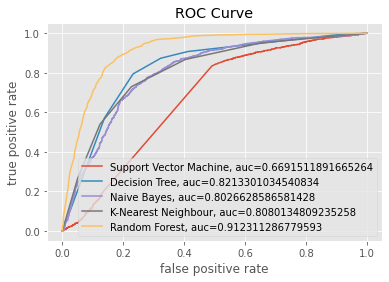

In [37]:
# Comparing ROC Curves
plt.plot(fprsvm,tprsvm,label="Support Vector Machine, auc="+str(aucsvm))
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprknn,tprknn,label="K-Nearest Neighbour, auc="+str(aucknn))
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.title('ROC Curve')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Conclusion**


*   from 5 model above Decision Tree is a model with biggest accuracy about 77,99%. 
*  Based on decision tree classifier, The top three most important features for our classifier are Duration (how long it took the conversation between the sales representative and the potential client), contact (number of contacts to the potential client within the same marketing campaign), month (the month of the year).

